<a href="https://colab.research.google.com/github/rishitarya/American-Options/blob/main/MCS_AO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import pandas as pd
import datetime
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def bs(S,K,r,T,sig,type="call"):
  T = T/365
  d1 = (np.log(S/K) + (sig**2*T/2+ r)*T)/sig*np.sqrt(T)
  d2 = d1 - sig*np.sqrt(T)
  K_eff = K*np.exp(-1*r*T)
  op = np.random.rand()
  if(type=='call'):
    op = S*norm.cdf(d1,0,1) - K_eff*norm.cdf(d2,0,1)
  elif(type=='put'):
    op = K_eff*norm.cdf(-d2,0,1) - S*norm.cdf(-d1,0,1)
  else:
    print('Unexpected Type of option')
  return op

In [ ]:
bs(S=17312.9,K=17000.0,r=0.0288,T=30,sig=0.3741)

903.6253371120092

In [ ]:
def MCSim(S,K,r,T,sig,n_sims = 100,type='call'):
  simf = []
  sims = np.random.normal(size = [n_sims,T])
  # print(sims)
  sims = np.append(np.ones([n_sims,1])*S,sims,axis=1)
  deltat = 1/365
  alpha = 1.2
  thres = alpha*S*np.exp(r*T/365)
  stopping_payoff = []
  es = 0
  for i in range(1,T+1):
    sims[:,i] = sims[:,i-1]*np.exp((r-((sig**2)/2))*deltat + sig*np.sqrt(deltat)*sims[:,i])
    pays = sims[:,i] - K
    pays = np.where(pays<0, 0, pays)
    payoff = np.mean(pays)
    for p in range(sims.shape[0]):
      try:
        if sims[p,i]> thres:
          simf.append(list(sims[p,:i+1]))
          sims = np.delete(sims,p,0)
          es += 1
      except:
        continue
  for siml in sims:
    simf.append(list(siml))
  sns.set_style('darkgrid')
  for sim in simf:
    val = max(sim[-1]-K,0)
    stopping_payoff.append((val)*np.exp(r*(((T-len(sim))/365))))
    plt.plot(range(1,len(sim)+1),sim,'-')
  plt.title('Monte Carlo Simulation for the option')
  print('option price should be',np.exp(-1*r*T/365)*(sum(stopping_payoff)/n_sims))
  print('early stopping',es)
  return np.exp(-1*r*T/365)*(sum(stopping_payoff)/n_sims)

In [ ]:
bs(S=468.60,K=470.0,r=0.0288,T=29,sig=0.3906)

20.392188963030378

option price should be 21.00658979630852
early stopping 31


21.00658979630852

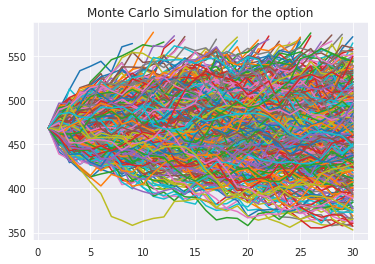

In [ ]:
MCSim(S=468.60,K=470.0,r=0.0288,T=29,sig=0.3906,n_sims=500)